# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
#!pip install black[jupyter]
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV


<IPython.core.display.Javascript object>

In [2]:
# mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

<IPython.core.display.Javascript object>

Import Dataset

In [4]:
visa = pd.read_csv("EasyVisa.csv")
# visa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv")

<IPython.core.display.Javascript object>

In [5]:
data = visa.copy()

<IPython.core.display.Javascript object>

View the first and las 5 rowa of the dataset

In [6]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [7]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [8]:
# view dimensions of the data
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [9]:
# check for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# check data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

Lets convert the columns with 'object' datatype to categorical variable

In [11]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


<IPython.core.display.Javascript object>

In [12]:
# check data types of the columns for the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

All correctly converted.

In [13]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [14]:
# Data Stats
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Let's check the count of each unique category in each of the categorical variables.

In [15]:
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.has_job_experience.value_counts())
print(data.requires_job_training.value_counts())
print(data.region_of_employment.value_counts())
print(data.unit_of_wage.value_counts())
print(data.full_time_position.value_counts())
print(data.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


<IPython.core.display.Javascript object>

In [16]:
# check the number of unique values for each categorical variable
print(data["continent"].nunique())
print(data["education_of_employee"].nunique())
print(data["has_job_experience"].nunique())
print(data["requires_job_training"].nunique())
print(data["region_of_employment"].nunique())
print(data["unit_of_wage"].nunique())
print(data["full_time_position"].nunique())
print(data["case_status"].nunique())

6
4
2
2
5
4
2
2


<IPython.core.display.Javascript object>

In [17]:
data.drop(["case_id"], axis=1, inplace=True)  ## drop 'case_id' column from the data

<IPython.core.display.Javascript object>

In [18]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

### General Observation
- The data has 12 column and 25480 rows
- There are no duplicate data
- There were 9 objects which I converted to categorical variables for ease of processing
- There is a total of 25480 cases coming from 6 different continents with Asia being the top
- Most of the applicants have a bachelors degree and also have job expereince
- A high number of applicants intended to be employed in the Northeast region, about 28 percent
- The mean prevailing wage is 74,455 and most applicants were paid annually.
- About 89 percent of positions wer full time and 67 percent of applicants were certified

# Univariate Analysis

**Function for labelled box plots**

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Observations on number of employees**

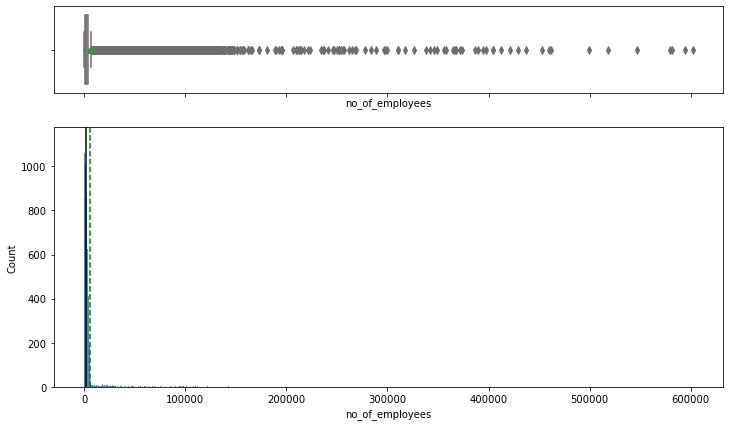

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "no_of_employees")

**Observations on prevailing wage**

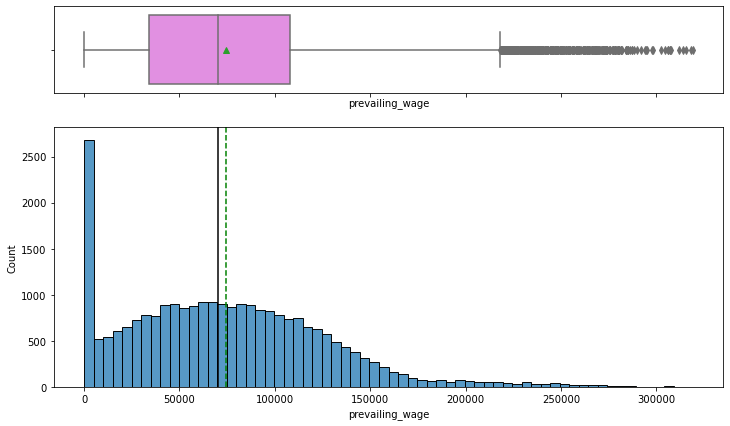

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(
    data, "prevailing_wage"
)  ## code to create histogram_boxplot for prevailing wage

In [22]:
# checking the observations which have less than 100 prevailing wage
pd.set_option("display.max_rows", 200)
data.loc[
    data["prevailing_wage"] < 100, "unit_of_wage"
]  ## code to find the rows with less than 100 prevailing wage

338      Hour
634      Hour
839      Hour
876      Hour
995      Hour
1144     Hour
1147     Hour
1215     Hour
1238     Hour
1326     Hour
1333     Hour
1346     Hour
1409     Hour
1872     Hour
1880     Hour
2010     Hour
2335     Hour
2384     Hour
2492     Hour
2628     Hour
2688     Hour
2700     Hour
2860     Hour
3035     Hour
3459     Hour
3491     Hour
3665     Hour
3878     Hour
3938     Hour
4255     Hour
4536     Hour
4812     Hour
5090     Hour
5377     Hour
5384     Hour
5455     Hour
5545     Hour
5546     Hour
5562     Hour
6006     Hour
6220     Hour
6770     Hour
7007     Hour
7066     Hour
7084     Hour
7127     Hour
7145     Hour
7352     Hour
7410     Hour
7530     Hour
7644     Hour
7824     Hour
7925     Hour
8007     Hour
8233     Hour
8244     Hour
8412     Hour
8488     Hour
8624     Hour
8769     Hour
8881     Hour
8914     Hour
9281     Hour
9363     Hour
9536     Hour
9808     Hour
9813     Hour
9899     Hour
10006    Hour
10087    Hour
10111    Hour
10241 

<IPython.core.display.Javascript object>

In [23]:
data.loc[
    data["prevailing_wage"] < 100, "unit_of_wage"
].count()  ## code to get the count of the values in the mentioned column

176

<IPython.core.display.Javascript object>

**Function for labelled bar plot**

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**Observations on continent**

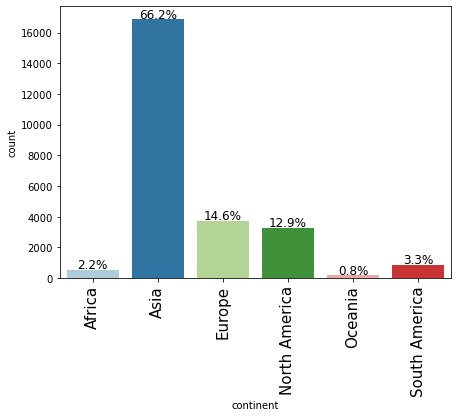

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "continent", perc=True)

**Observations on education of employees**

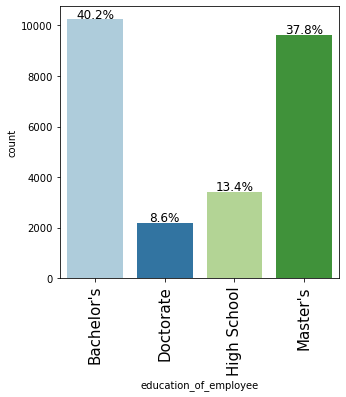

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observations on job experience**

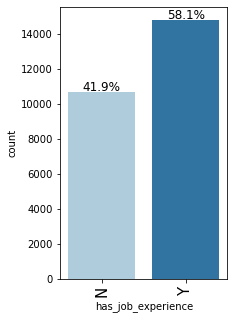

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "has_job_experience", perc=True)

**Observations on job training**

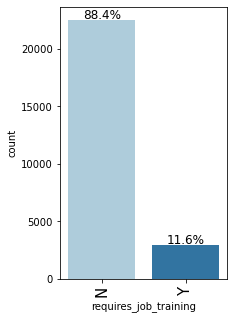

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "requires_job_training", perc=True)

**Observations on region of employment**

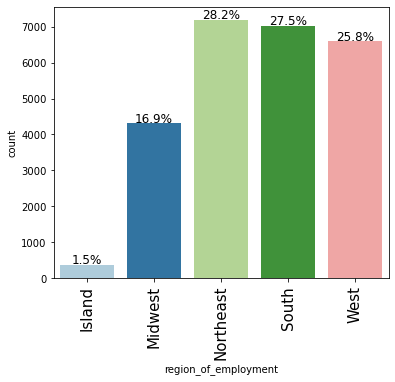

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "region_of_employment", perc=True)

**Observations on wage**

In [35]:
##labeled_barplot(data, "prevailing_wage", perc=True)

<IPython.core.display.Javascript object>

**Observations on case status**

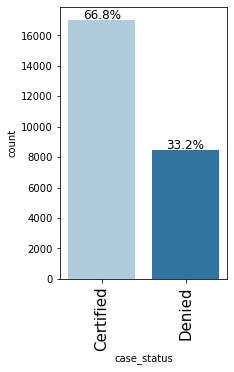

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "case_status", perc=True)

### Univariate Analysis
- Data for the prevailing wage follows a normal distribution but is skewed to the right
- It also a high number of values near zero which I presume to be possible missing values
- 65% of applicants are attributted to the Asian continent, followed by Europe at 14.6 percent and North America at 12.9 percent. Only 9 percent of applicants have a doctorate degree
- 40 percent of applicants have a bachelors degree followed closely by a masters degree at 38 percent
- 58 percent of applicants have job expereince and 88 percent had job training
- 28 percent of applicants were employed in the Northeast region followed closely by 27 percent in the south and 25 percent in the west
- About 89 percent of positions wer full time and 67 percent of applicants were certified

# Bivariate Analysis

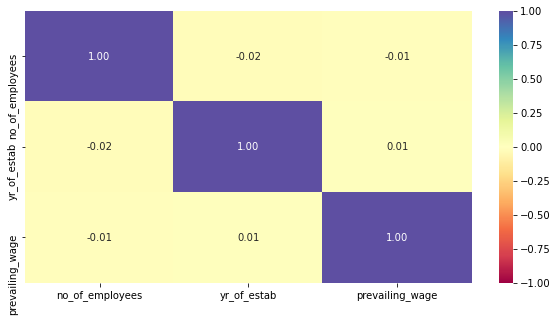

<IPython.core.display.Javascript object>

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)  ## Complete the code to find the correlation between the variables
plt.show()

**More functions to help with analysis**

In [37]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [38]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Question 1 - Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


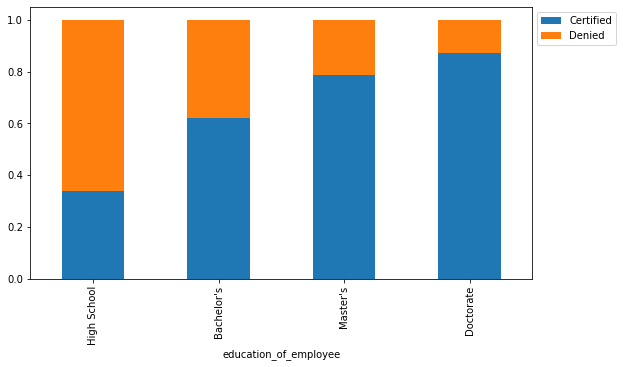

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "education_of_employee", "case_status")

**Question 2 - How does the visa status vary across different continents?**

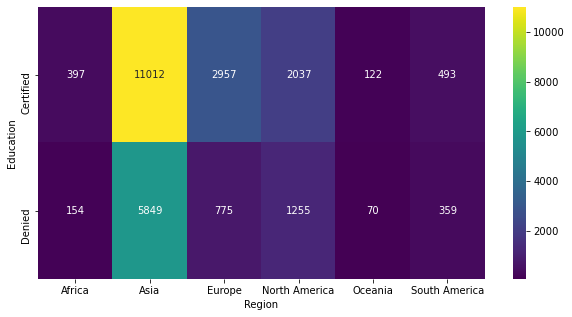

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data.case_status, data.continent), annot=True, fmt="g", cmap="viridis"
)  ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Question 3 - Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

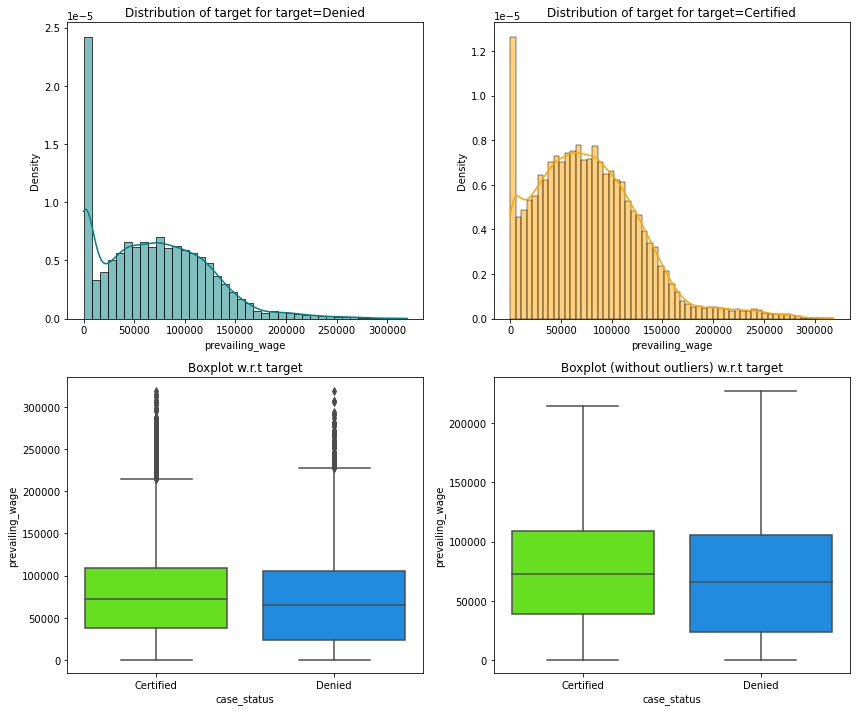

<IPython.core.display.Javascript object>

In [41]:
distribution_plot_wrt_target(
    data, "prevailing_wage", "case_status"
)  ## Complete the code to find distribution of prevailing wage and case status

**Question 4 - In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


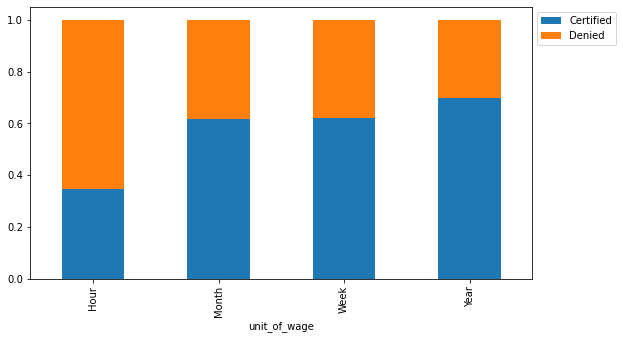

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(
    data, "unit_of_wage", "case_status"
)  ## Complete the code to plot stacked barplot for unit of wage and case status

**Question 5 - The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

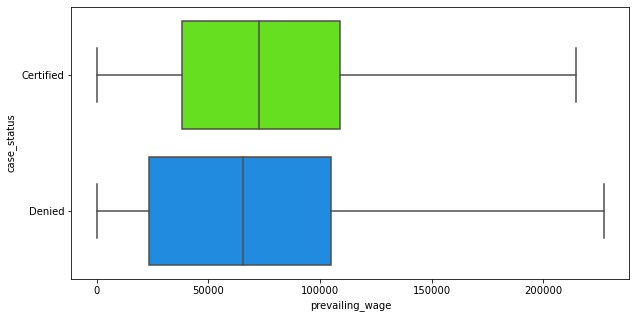

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="prevailing_wage",
    y="case_status",
    showfliers=False,
    palette="gist_rainbow",
)  ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

### BI Variate
- There is almost no correlation between the numberical variables 
- The data supports the idea that those with higher education travel abroad for better pay.
- We can see that the applicants with the highest educationl qualifications were certified so almost 85 percent of applicants with a doctorate degree were certified compared to about 35 percent for high school certificate holders.

- We can also observe that the data support the assertion that the highest number of applicants are from the Asian continent with the heatmap showing the brightest colour for applicants from Asia that were certified

- The data also supports the asertion that experience professionals  might look abroad for better opportunities.
- We see that the prevailing wage data for both the certified and denied applicants follow a normal distribution but is slightly skewed to the right.
- We see a lot of outliers to the top end of the data for a prevailing wage of 220000 upwards for both denied and certified applicants. This could mean that organisations tend to impose a more stringent criteria when hiring applicants who earn in that bracket.

- Without the outliers it becomes clear that applicanst with enough expereince to earn a prevailing wage between 40000 and 110000 are more likely to be certified so they will definately pursure better carrer development abroad.

- The data also shows that the yearly/annual pay intervals are prefered in the united states with a higher proportion of jobs being permanent. 
- We see that 70 percent of annually paid jobs have certified an applicant with weekly and monthly paid jobs certifying 60 percent of applicants, Hourly paid jobs certify the least number of applicants because the probably tend to be jobs requirering less skillset  and this talent are more likely to be found within the United states.

- We can see that the an increase in the prevailing wage up to about 110000 increased the likelihood of an applicant being certified 



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

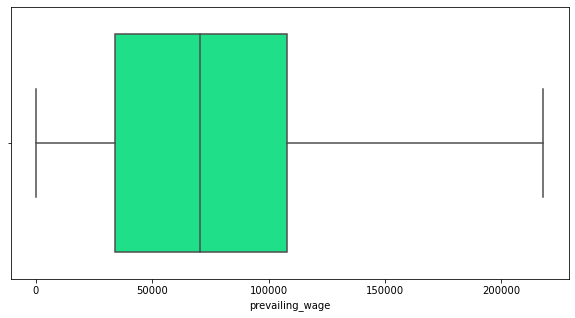

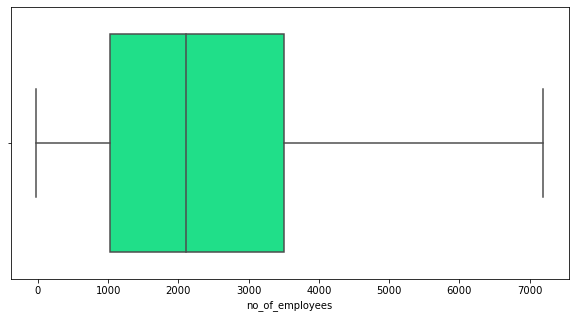

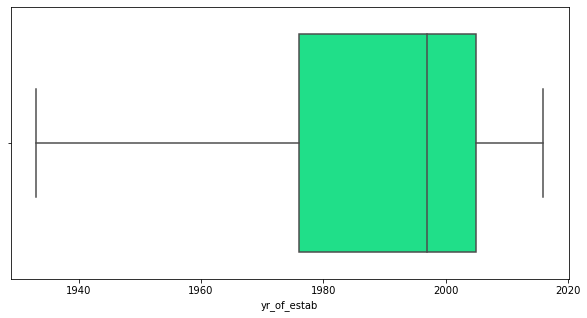

<IPython.core.display.Javascript object>

In [45]:
# outlier detection using boxplot
# numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, x="prevailing_wage", showfliers=False, palette="gist_rainbow"
)  ## Complete the code to create boxplots for all the numeric columns
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="no_of_employees", showfliers=False, palette="gist_rainbow")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="yr_of_estab", showfliers=False, palette="gist_rainbow")
plt.show()

**Data Preperation for modelling**
- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [46]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
X = data.drop(
    ["case_status"], axis=1
)  ## Complete the code to drop case status from the data
Y = data["case_status"]
X = pd.get_dummies(X, drop_first=True)

# X = pd.get_dummies(
#    data,
#    columns=["continent", "education_of_employee", "has_job_experience", "requires_job_training", "region_of_employment", "unit_of_wage", "full_time_position"],
#    drop_first=True,
# )  ## Complete the code to create dummies for X
# data["case_status"] = data["case_status"].apply(lambda x: 1 if x=="Certified" else 0)
# Y = data["case_status"]
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)  ## Code to split the data into train and test in the ratio 70:30#

<IPython.core.display.Javascript object>

In [49]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### Let's create functions to calculate different metrics and confusion matrix to stop us using the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [51]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building bagging and boosting models

### Decision Tree Model

Looking at the existing data, 66.79% of applicants were granted visas while 33.21% were denied so the class weight parameter will be {0:0.67,1:0.33}

In [52]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
)  ## Code to define decision tree classifier with random state = 1
model.fit(X_train, y_train)  ## Code to fit decision tree classifier on the train data

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

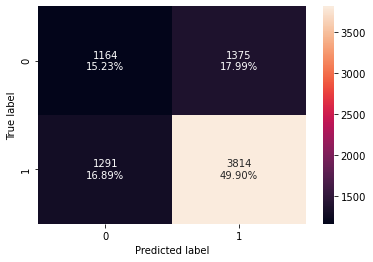

<IPython.core.display.Javascript object>

In [53]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ## Complete the code to create confusion matrix for train data

In [54]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)  ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [55]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)  ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.65123,0.747111,0.735016,0.741014


<IPython.core.display.Javascript object>

The decision tree is heavily overfitting

### Hyperparameter Tuning - Decision Tree

In [56]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator, parameters, scoring=scorer
)  ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

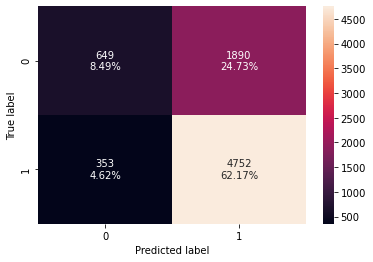

<IPython.core.display.Javascript object>

In [57]:
confusion_matrix_sklearn(
    dtree_estimator, X_test, y_test
)  ## create confusion matrix for train data on tuned estimator

In [58]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


<IPython.core.display.Javascript object>

In [59]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

### Bagging Classifier

In [60]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

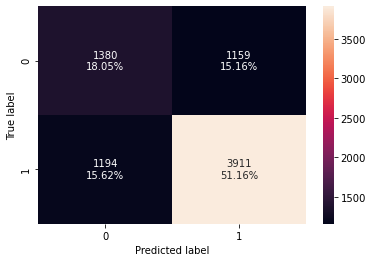

<IPython.core.display.Javascript object>

In [61]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [62]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016


<IPython.core.display.Javascript object>

In [132]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


<IPython.core.display.Javascript object>

Again, we see extreme overfitting

### Hyperparameter Tuning - Bagging Classifier

In [88]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=parameters,
    scoring="recall",
    cv=5,
)  ## Code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)  ## Code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

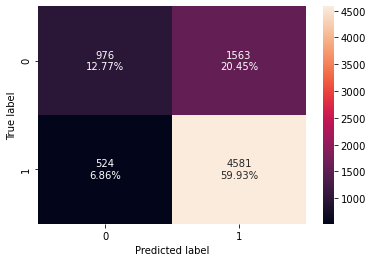

<IPython.core.display.Javascript object>

In [89]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [90]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995851  0.999916   0.993909  0.996904


<IPython.core.display.Javascript object>

In [91]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.726975  0.897356   0.745605  0.814472


<IPython.core.display.Javascript object>

### Bagging Classifier with weighted decision tree

In [64]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

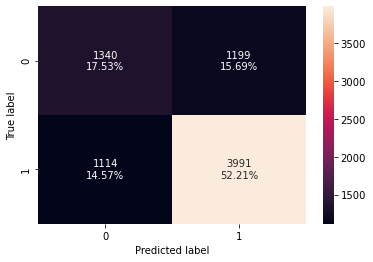

<IPython.core.display.Javascript object>

In [65]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [66]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986821   0.991231  0.989021


<IPython.core.display.Javascript object>

In [67]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_wt, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.69741  0.781783   0.768979  0.775328


<IPython.core.display.Javascript object>

### Random Forest

In [68]:
# Fitting the model
rf_estimator = RandomForestClassifier(
    random_state=1
)  ## Code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train, y_train)  ## Code to fit random forest on the train data

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

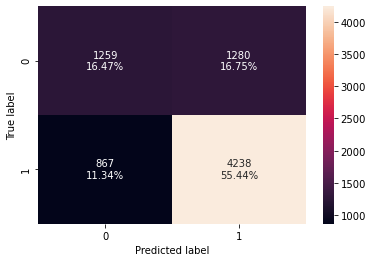

<IPython.core.display.Javascript object>

In [69]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [70]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


<IPython.core.display.Javascript object>

In [71]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719126,0.830167,0.768032,0.797891


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Random Forest

In [92]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    rf_tuned, parameters, scoring=scorer
)  ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

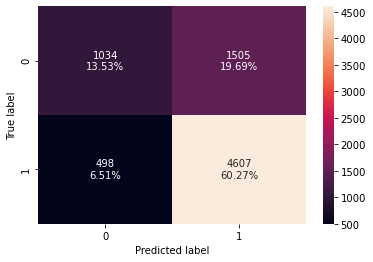

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(
    rf_tuned, X_test, y_test
)  ## Code to create confusion matrix for train data on tuned estimator

In [94]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767493,0.920675,0.77403,0.841008


<IPython.core.display.Javascript object>

In [135]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.737964,0.902449,0.753763,0.821432


<IPython.core.display.Javascript object>

I will leave out XGBoost due to performance issues and the fact that  it is optional

## Bagging Classifier with weighted decision tree

In [72]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

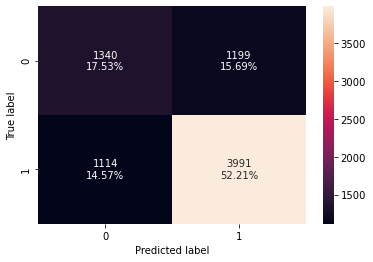

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [74]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016


<IPython.core.display.Javascript object>

In [75]:
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Bagging Classifier

In [141]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=parameters,
    scoring="recall",
    cv=5,
)  ## Code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)  ## Code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

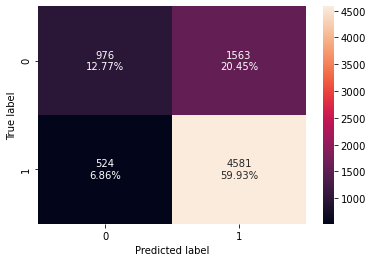

<IPython.core.display.Javascript object>

In [142]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [143]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995851  0.999916   0.993909  0.996904


<IPython.core.display.Javascript object>

In [144]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.726975  0.897356   0.745605  0.814472


<IPython.core.display.Javascript object>

### Bagging Classifier with weighted decision tree

In [76]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

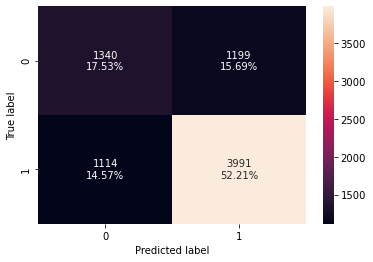

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [78]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986821   0.991231  0.989021


<IPython.core.display.Javascript object>

In [79]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_wt, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.69741  0.781783   0.768979  0.775328


<IPython.core.display.Javascript object>

### Random Forest

In [80]:
# Fitting the model
rf_estimator = RandomForestClassifier(
    random_state=1
)  ## Code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train, y_train)  ## Code to fit random forest on the train data

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

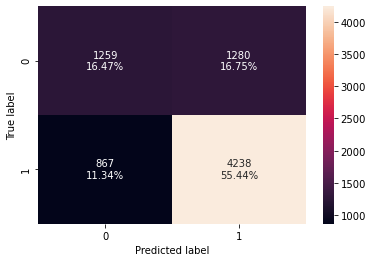

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [82]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


<IPython.core.display.Javascript object>

In [83]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719126,0.830167,0.768032,0.797891


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Random Forest

In [108]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    rf_tuned, parameters, scoring=scorer
)  ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

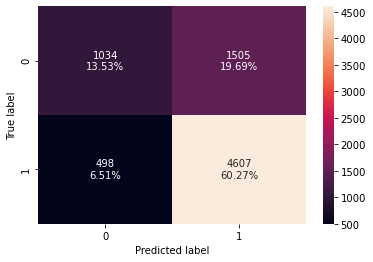

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(
    rf_tuned, X_test, y_test
)  ## Code to create confusion matrix for train data on tuned estimator

In [110]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767493,0.920675,0.77403,0.841008


<IPython.core.display.Javascript object>

In [136]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.737964,0.902449,0.753763,0.821432


<IPython.core.display.Javascript object>

### AdaBoost Classifier

In [84]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

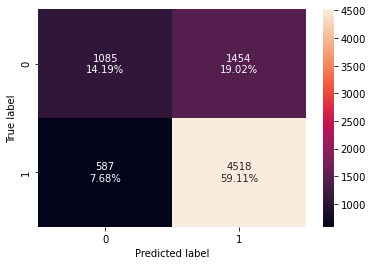

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(
    ab_classifier, X_test, y_test
)  ## Code to create confusion matrix for train data on AdaBoost Classifier

In [86]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)  ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738058,0.887434,0.760411,0.819027


<IPython.core.display.Javascript object>

In [87]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)  ## Complete the code to check performance on test data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.732993,0.885015,0.75653,0.815744


<IPython.core.display.Javascript object>

### Hyperparameter  Tunning - AdaBoost Classifier

In [113]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    abc_tuned, parameters, scoring=acc_scorer, cv=5
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)
## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

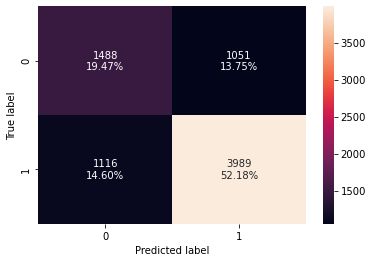

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(
    abc_tuned, X_test, y_test
)  ## Code to create confusion matrix for train data on AdaBoost Classifier

In [115]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

In [116]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

In [99]:
gb_classifier = GradientBoostingClassifier(
    random_state=1
)  ## Code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(
    X_train, y_train
)  ## Code to fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

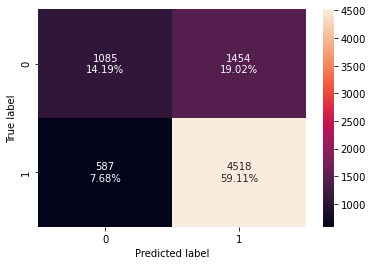

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(
    ab_classifier, X_test, y_test
)  ## Code to create confusion matrix for train data on GradientBoost Classifier

In [101]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)  ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759419,0.882901,0.784106,0.830576


<IPython.core.display.Javascript object>

In [102]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)  ## Complete the code to check performance on test data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.873262,0.773555,0.82039


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Classifier

In [128]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    gbc_tuned, parameters, scoring=acc_scorer, cv=5
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

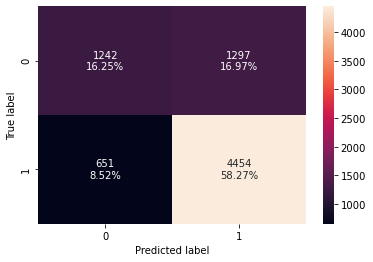

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(
    gbc_tuned, X_test, y_test
)  ## Code to create confusion matrix for train data on GradientBoost Classifier

In [130]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)  ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764073,0.88416,0.788339,0.833505


<IPython.core.display.Javascript object>

In [131]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)  ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.872478,0.774474,0.82056


<IPython.core.display.Javascript object>

### Important features of the final model

## Model Performance Comparison and Conclusions

feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Bagging Models
- Looking at the confusion matrix as well as accuracy, recall and precision fo all the bagging models I would say that that:
- Hyper parameter tunning significantly imroved the decision tree
- The bagging classifer with weighted decision tree performed well but not as well as a tuned decision tree
- The bagging classifier was significantly improved by hyper parameter tuning
- The random forest performed slightly better than the decision tree and bagging classifer with weighted decision tree
- Hyperparameter Tuning improved the Random Forest and it had one of the best performance across the board

### Boosting Models
- The boosting models did better overall
- ADABoost classifier was not improved by hyper parameter tunning
- The GradientBoost was slightly improved by hyper parameter tunning

## Actionable Insights and Recommendations

- I will highly recommend trating the data for outliers for future analysis
- It will be highly beneficial to prioritise applicants from the Asian continent when looking for educated and experienced employees to issue a visa as the data shows they tend to be a good fit for employers
- Employers might want to offer more training and opportunities to local employees to bring them up to par with their expectations
- The best performing models are able to make predictions up to an F1 score of 82%

